#1.Importando a Base

In [ ]:
!pip install geopandas geobr pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.1
    Uninstalling shapely-2.1.1:
      Successfully uninstalled shapely-2.1.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.1
    Uninstalling geopandas-1.1.1:
      Successfully uninstalled geopandas-1.1.1


In [ ]:
# Importação das bibliotecas
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geobr import read_state
import seaborn as sns
import plotly.express as px
import json
import io

# Upload do dataset
uploaded = files.upload()

for fn in uploaded.keys():
    print(f'Arquivo carregado: {fn} ({len(uploaded[fn])} bytes)')
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=",")



Saving novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda - novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda.csv to novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda - novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda.csv
Arquivo carregado: novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda - novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda.csv (512315 bytes)


In [ ]:
# Carregando o dataset com separador ";"
df = pd.read_csv("novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda - novo_df_tratado_colunas-excluidas_faixa-etaria_faixa-gastos-media_media-renda.csv", sep=",")

In [ ]:
# Verificando as primeiras linhas
print(df.head())
print(df.info())

# 2. Como os visitantes receberam informações sobre o carnaval


## Insigths:
A pesquisa foi realizada com 1120 pessoas, identificanddo que pouco mais de 80 pessoas tiveram acesso ao evento por meio de amigos e parentes. Esse canal pode ser fortalecido com disponibilização de vouchers ou descontos com parceiras ccom comercios locais, blocos e eventos no período, atraindo mais publicos indicados.

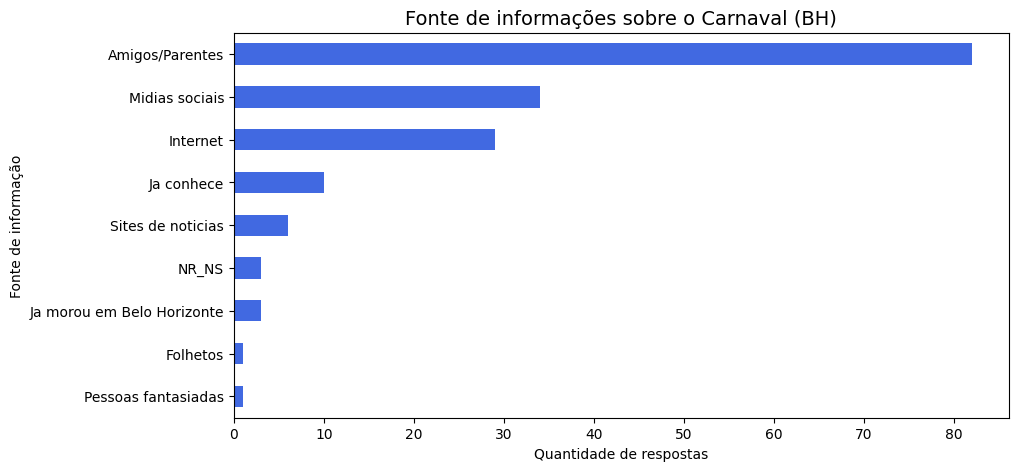

🔎 Insight: Observa-se que a principal forma de divulgação foi: Amigos/Parentes (82 respostas).
Sugestão: Fortalecer esse canal com parcerias, promoções e materiais direcionados.



In [ ]:
# Contagem das fontes
plt.figure(figsize=(10,5))
info_carnaval = df['fonte_info_carnaval_bh'].value_counts().sort_values(ascending=True)

info_carnaval.plot(kind='barh', color='royalblue')
plt.title("Fonte de informações sobre o Carnaval (BH)", fontsize=14)
plt.xlabel("Quantidade de respostas")
plt.ylabel("Fonte de informação")
plt.show()

print("🔎 Insight: Observa-se que a principal forma de divulgação foi:", info_carnaval.idxmax(),
      f"({info_carnaval.max()} respostas).")
print("Sugestão: Fortalecer esse canal com parcerias, promoções e materiais direcionados.\n")

## 2.1 Público que não respondeu

### Das 1120 pessoas entrevistadas 950 são moradores que não responderam são de BH - Minas Gerais.

In [ ]:
contagem_morador = df.groupby('morador')['fonte_info_carnaval_bh'].apply(lambda s: s.isnull().sum())
print("Contagem de moradores sem resposta por grupo:\n", contagem_morador)

Contagem de moradores sem resposta por grupo:
 morador
Morador      950
Visitante      0
Name: fonte_info_carnaval_bh, dtype: int64


# 3. Analise das experiências


In [ ]:
cols_exp = ['avaliacao_geral', 'banheiros', 'seguranca', 'precos']
cols_exp = ['alem_dos_blocos_1','avaliacao_geral','banheiros','seguranca','precos','transporte_blocos_1']

# Estatísticas descritivas
print("\n📈 Estatísticas descritivas das avaliações:")
print(df[cols_exp].describe().round(2))


📈 Estatísticas descritivas das avaliações:
       avaliacao_geral  banheiros  seguranca     precos
count          1119.00    1119.00    1119.00    1119.00
mean           8051.49   76860.02    5369.19   42007.60
std           89359.88  266477.35   73060.67  200681.48
min               3.00       1.00       1.00       1.00
25%               8.00       5.00       6.00       5.00
50%               9.00       7.00       8.00       7.00
75%              10.00       9.00       9.50       8.00
max          999999.00  999999.00  999999.00  999999.00


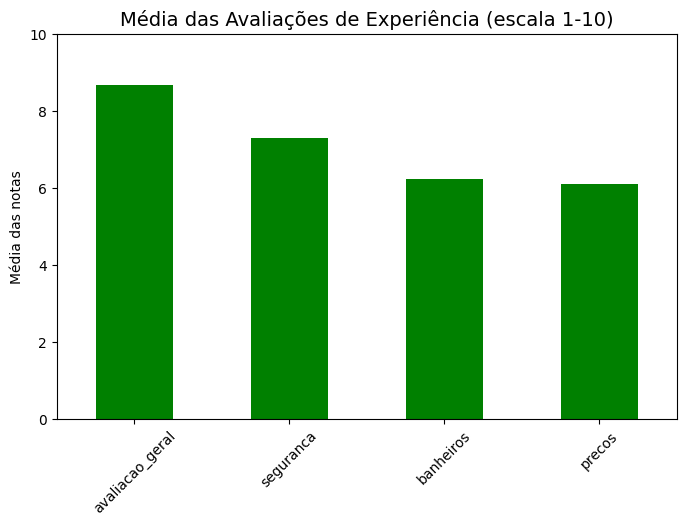

🔎 Insight: As avaliação geral mostraram que banheiros e preços foram as mais baixas, pontos que os organizadores podem atuar nos próximos eventos por meio de parcerias com o comercio local, assim seria possível elevar a avaliação dos dois pontos, o que automaticamente influenciariam em segurança, uma vez que os foliois estariam buscando locais mais seguros.


In [ ]:
# Médias das avaliações
avaliacoes = df[['avaliacao_geral','banheiros','seguranca','precos']].copy()

# Substituir valores inválidos (999999) por NaN
avaliacoes = avaliacoes.replace(999999, np.nan)

# Calcular a média de cada coluna
medias = avaliacoes.mean().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,5))
medias.plot(kind='bar', color='green')
plt.title("Média das Avaliações de Experiência (escala 1-10)", fontsize=14)
plt.ylabel("Média das notas")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.show()

print("🔎 Insight: As avaliação geral mostraram que banheiros e preços foram as mais baixas, pontos que os organizadores podem atuar nos próximos eventos por meio de parcerias com o comercio local, assim seria possível elevar a avaliação dos dois pontos, o que automaticamente influenciariam em segurança, uma vez que os foliois estariam buscando locais mais seguros.")

# 4. Cruzar UF/País x Visitantes

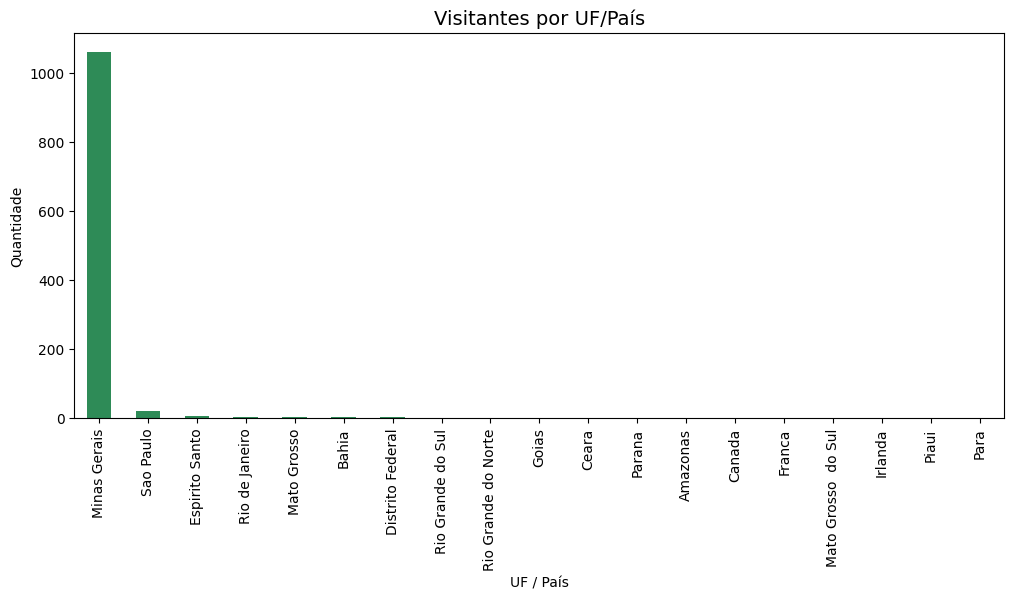

🔎 Insight: O maior volume de visitantes vem do próprio estado de: Minas Gerais (1061 visitantes). Isso reforça que o governo do estado pode investir mais para fomentar o comercio além de divulgação boca a boca que irá gerar


In [ ]:
tabela_uf = df.groupby('uf_pais')['morador'].count().reset_index()
tabela_uf_ord = tabela_uf.set_index('uf_pais')['morador'].sort_values(ascending=False)

plt.figure(figsize=(12,5))
tabela_uf_ord.plot(kind='bar', color='seagreen')
plt.title("Visitantes por UF/País", fontsize=14)
plt.ylabel("Quantidade")
plt.xlabel("UF / País")
plt.show()

print("🔎 Insight: O maior volume de visitantes vem do próprio estado de:", tabela_uf_ord.idxmax(),
      f"({tabela_uf_ord.max()} visitantes). Isso reforça que o governo do estado pode investir mais para fomentar o comercio além de divulgação boca a boca que irá gerar")

# 4.1 Mapa de Visitantes por UF/País

In [ ]:
# Tabela de visitantes por estado
# Lista de todos os estados brasileiros
estados_brasil = [
    "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul",
    "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí",
    "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia",
    "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"
]

# Criar tabela de visitantes por estado
tabela_uf = df.groupby('uf_pais')['morador'].count().reset_index()
tabela_uf.columns = ['estado', 'qtd_visitantes']

# Garantir que todos os estados apareçam (mesmo os sem visitantes)
tabela_uf = tabela_uf.set_index("estado").reindex(estados_brasil, fill_value=0).reset_index()

# Criar mapa coroplético
fig = px.choropleth(
    tabela_uf,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations="estado",
    featureidkey="properties.name",
    color="qtd_visitantes",
    color_continuous_scale="Greens",  # Escala em verde
    title="🗺️ Visitantes por Estado - Carnaval BH"
)

# Ajustar visualização (mostrar Brasil inteiro)
fig.update_geos(fitbounds="locations", visible=False)

# Deixar estados sem dados em cinza clarinho
fig.update_traces(marker_line_color="black", marker_line_width=0.5, selector=dict(type="choropleth"))
#fig.update_layout(geo_bgcolor="lightgray")

fig.show()

print("🔎 Insight: O mapa evidencia que a grande maioria dos visitantes é de Minas Gerais, seguido por alguns estados vizinhos como Rio de Janeiro e Bahia. Isso mostra que o Carnaval de BH ainda tem um perfil regional, atraindo principalmente público do Sudeste e parte do Nordeste.\n")
print("Sugestão: A organização pode fortalecer ações de marketing em estados vizinhos, aproveitando a proximidade geográfica, mas também investir em campanhas específicas para estados com baixa presença (como Norte e Sul), a fim de ampliar o alcance e consolidar o evento como uma referência nacional.\n")

🔎 Insight: O mapa evidencia que a grande maioria dos visitantes é de Minas Gerais, seguido por alguns estados vizinhos como Rio de Janeiro e Bahia. Isso mostra que o Carnaval de BH ainda tem um perfil regional, atraindo principalmente público do Sudeste e parte do Nordeste.

Sugestão: A organização pode fortalecer ações de marketing em estados vizinhos, aproveitando a proximidade geográfica, mas também investir em campanhas específicas para estados com baixa presença (como Norte e Sul), a fim de ampliar o alcance e consolidar o evento como uma referência nacional.



# 📊 Conclusões e Sugestões:
1. A divulgação boca a boca (amigos/parentes) é relevante → pode ser explorada com marketing de indicação.
2. Banheiros e segurança foram mal avaliados → precisam de atenção imediata da organização.
3. Minas Gerais concentra a maior parte dos visitantes → foco em estratégias regionais pode ser eficiente.
4. Próximos passos: criar dashboards no Looker, integrar SQL para consultas diretas e usar mapas geográficos interativos (ex.: plotly, geopandas).